## Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head(5)

,Unnamed: 0,outlet_code,item_code,item_brand,item_description,segment,promotion_description,vol_hl,year,quarter,...,company_code,item_in_hl,item_sub_brand,quatity,date,is_weekend,is_holiday,week_of_month,is_season,day_of_weeks
0,0,71000069,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,7.9200,2022,1,...,10290577,0.0792,abc stout,100,2022-01-17,0,0,3,0,monday
1,1,71000069,10003707,abc,abc extra stout pint 24x33cl,drink shop,promo,0.5544,2022,1,...,10290577,0.0792,abc stout,7,2022-01-25,0,0,4,0,tuesday
2,2,71000101,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,3.9600,2022,1,...,10290577,0.0792,abc stout,50,2022-01-03,0,0,1,0,monday
3,3,71000101,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,11.8800,2022,1,...,10290577,0.0792,abc stout,150,2022-01-11,0,0,2,0,tuesday
4,4,71000101,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,39.6000,2022,1,...,10290577,0.0792,abc stout,500,2022-01-15,1,0,3,0,saturday


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(5)

,outlet_code,item_code,item_brand,item_description,segment,promotion_description,vol_hl,year,quarter,month,...,company_code,item_in_hl,item_sub_brand,quatity,date,is_weekend,is_holiday,week_of_month,is_season,day_of_weeks
0,71000069,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,7.9200,2022,1,1,...,10290577,0.0792,abc stout,100,2022-01-17,0,0,3,0,monday
1,71000069,10003707,abc,abc extra stout pint 24x33cl,drink shop,promo,0.5544,2022,1,1,...,10290577,0.0792,abc stout,7,2022-01-25,0,0,4,0,tuesday
2,71000101,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,3.9600,2022,1,1,...,10290577,0.0792,abc stout,50,2022-01-03,0,0,1,0,monday
3,71000101,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,11.8800,2022,1,1,...,10290577,0.0792,abc stout,150,2022-01-11,0,0,2,0,tuesday
4,71000101,10003706,abc,abc extra stout can 24x33cl,drink shop,promo,39.6000,2022,1,1,...,10290577,0.0792,abc stout,500,2022-01-15,1,0,3,0,saturday


In [6]:
df.drop('outlet_code', axis=1, inplace=True)
df.drop('item_code', axis=1, inplace=True)
df.drop('promotion_description', axis=1, inplace=True)
df.drop('company_code', axis=1, inplace=True)

In [7]:
df.head(5)

,item_brand,item_description,segment,vol_hl,year,quarter,month,day,item_in_hl,item_sub_brand,quatity,date,is_weekend,is_holiday,week_of_month,is_season,day_of_weeks
0,abc,abc extra stout can 24x33cl,drink shop,7.9200,2022,1,1,17,0.0792,abc stout,100,2022-01-17,0,0,3,0,monday
1,abc,abc extra stout pint 24x33cl,drink shop,0.5544,2022,1,1,25,0.0792,abc stout,7,2022-01-25,0,0,4,0,tuesday
2,abc,abc extra stout can 24x33cl,drink shop,3.9600,2022,1,1,3,0.0792,abc stout,50,2022-01-03,0,0,1,0,monday
3,abc,abc extra stout can 24x33cl,drink shop,11.8800,2022,1,1,11,0.0792,abc stout,150,2022-01-11,0,0,2,0,tuesday
4,abc,abc extra stout can 24x33cl,drink shop,39.6000,2022,1,1,15,0.0792,abc stout,500,2022-01-15,1,0,3,0,saturday


In [8]:
df.drop('quarter', axis=1, inplace=True)
df.drop('day_of_weeks', axis=1, inplace=True)
df.drop('item_in_hl', axis=1, inplace=True)

In [9]:
df.head(5)

,item_brand,item_description,segment,vol_hl,year,month,day,item_sub_brand,quatity,date,is_weekend,is_holiday,week_of_month,is_season
0,abc,abc extra stout can 24x33cl,drink shop,7.9200,2022,1,17,abc stout,100,2022-01-17,0,0,3,0
1,abc,abc extra stout pint 24x33cl,drink shop,0.5544,2022,1,25,abc stout,7,2022-01-25,0,0,4,0
2,abc,abc extra stout can 24x33cl,drink shop,3.9600,2022,1,3,abc stout,50,2022-01-03,0,0,1,0
3,abc,abc extra stout can 24x33cl,drink shop,11.8800,2022,1,11,abc stout,150,2022-01-11,0,0,2,0
4,abc,abc extra stout can 24x33cl,drink shop,39.6000,2022,1,15,abc stout,500,2022-01-15,1,0,3,0


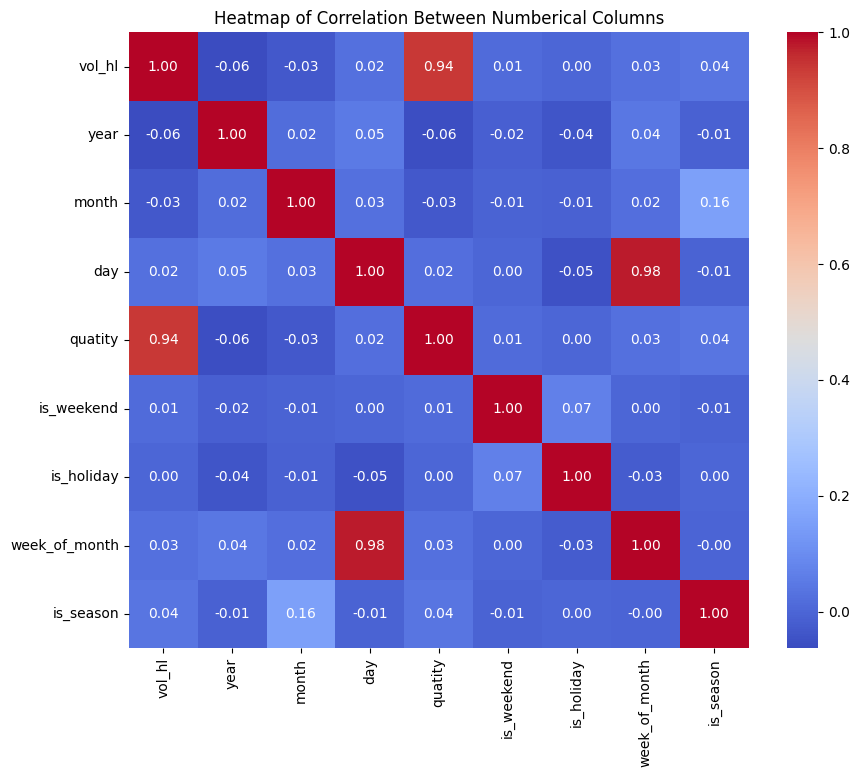

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Numberical Columns')
plt.show()

In [11]:
df['item_description'].value_counts()

item_description
abc extra stout can 24x33cl                   307338
tiger can 24x33cl                             115379
tiger crys can case 24x33cl slk promo kh       44139
tiger crystal can case 24x33cl slk kh          41124
tiger can case 24x33cl yott kh                 40244
tiger can case 24x33cl slk promo kh            32997
abc can case 24x33cl c000                      29510
tiger crystal pint 24x33cl                     27197
tiger crystal can 24x33cl                      24043
tiger crys/reg cp can case20x33+4x33clkh       22245
tiger pint 24x33cl                             12061
tiger can case 24x33cl slk kh                  11246
tiger crystal can case 24x33cl yott kh          7704
abc extra stout pint 24x33cl                    6865
abc extra stout can case 12x33cl                4050
tiger crys/soju cp can case 20x33+4x33cl        3403
tiger can case 12x33cl                          3313
abc reserve tall can case 24x33cl slk kh        3295
abc extra stout can case 24x3

In [12]:
df.head(5)

,item_brand,item_description,segment,vol_hl,year,month,day,item_sub_brand,quatity,date,is_weekend,is_holiday,week_of_month,is_season
0,abc,abc extra stout can 24x33cl,drink shop,7.9200,2022,1,17,abc stout,100,2022-01-17,0,0,3,0
1,abc,abc extra stout pint 24x33cl,drink shop,0.5544,2022,1,25,abc stout,7,2022-01-25,0,0,4,0
2,abc,abc extra stout can 24x33cl,drink shop,3.9600,2022,1,3,abc stout,50,2022-01-03,0,0,1,0
3,abc,abc extra stout can 24x33cl,drink shop,11.8800,2022,1,11,abc stout,150,2022-01-11,0,0,2,0
4,abc,abc extra stout can 24x33cl,drink shop,39.6000,2022,1,15,abc stout,500,2022-01-15,1,0,3,0


In [13]:
df.drop('date', axis=1, inplace=True)
df.drop('item_description', axis=1, inplace=True)

In [14]:
df.head(5)

,item_brand,segment,vol_hl,year,month,day,item_sub_brand,quatity,is_weekend,is_holiday,week_of_month,is_season
0,abc,drink shop,7.9200,2022,1,17,abc stout,100,0,0,3,0
1,abc,drink shop,0.5544,2022,1,25,abc stout,7,0,0,4,0
2,abc,drink shop,3.9600,2022,1,3,abc stout,50,0,0,1,0
3,abc,drink shop,11.8800,2022,1,11,abc stout,150,0,0,2,0
4,abc,drink shop,39.6000,2022,1,15,abc stout,500,1,0,3,0


In [15]:
df.drop('vol_hl', axis=1, inplace=True)

In [16]:
df.head(5)

,item_brand,segment,year,month,day,item_sub_brand,quatity,is_weekend,is_holiday,week_of_month,is_season
0,abc,drink shop,2022,1,17,abc stout,100,0,0,3,0
1,abc,drink shop,2022,1,25,abc stout,7,0,0,4,0
2,abc,drink shop,2022,1,3,abc stout,50,0,0,1,0
3,abc,drink shop,2022,1,11,abc stout,150,0,0,2,0
4,abc,drink shop,2022,1,15,abc stout,500,1,0,3,0


In [17]:
df.rename(columns={'quatity': 'quantity'}, inplace=True)

In [18]:
df.head(5)

,item_brand,segment,year,month,day,item_sub_brand,quantity,is_weekend,is_holiday,week_of_month,is_season
0,abc,drink shop,2022,1,17,abc stout,100,0,0,3,0
1,abc,drink shop,2022,1,25,abc stout,7,0,0,4,0
2,abc,drink shop,2022,1,3,abc stout,50,0,0,1,0
3,abc,drink shop,2022,1,11,abc stout,150,0,0,2,0
4,abc,drink shop,2022,1,15,abc stout,500,1,0,3,0


In [19]:
df['item_brand'].value_counts()

item_brand
tiger    390289
abc      354967
Name: count, dtype: int64

In [20]:
# Assuming your dataframe is named df
df['item_brand'] = df['item_brand'].replace({'tiger': 'a', 'abc': 'b'})

In [21]:
df['item_brand'].value_counts()

item_brand
a    390289
b    354967
Name: count, dtype: int64

In [22]:
df['item_sub_brand'].value_counts()

item_sub_brand
abc stout        351163
tiger            247822
tiger crystal    138648
tiger soju         3819
abc reserve        3804
Name: count, dtype: int64

In [23]:
# Assuming your dataframe is named df
df['item_sub_brand'] = df['item_sub_brand'].replace({'tiger': 'a_first', 'tiger crystal':'a_diamond','tiger soju':'a_korea','abc stout': 'b_strong','abc reserve': 'b_withhold',})

In [24]:
df['item_sub_brand'].value_counts()

item_sub_brand
b_strong      351163
a_first       247822
a_diamond     138648
a_korea         3819
b_withhold      3804
Name: count, dtype: int64

## Features Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder with drop='first' to avoid the dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical data
encoded_array = encoder.fit_transform(df[['item_brand', 'segment', 'item_sub_brand']])

# Convert the array to a DataFrame with the appropriate column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['item_brand', 'segment', 'item_sub_brand']))

# Combine with the original data if needed (drop original columns)
df= pd.concat([df.drop(['item_brand', 'segment', 'item_sub_brand'], axis=1), encoded_df], axis=1)

In [26]:
df.head(5)

,year,month,day,quantity,is_weekend,is_holiday,week_of_month,is_season,item_brand_b,segment_wholesaler,item_sub_brand_a_first,item_sub_brand_a_korea,item_sub_brand_b_strong,item_sub_brand_b_withhold
0,2022,1,17,100,0,0,3,0,1.0,0.0,0.0,0.0,1.0,0.0
1,2022,1,25,7,0,0,4,0,1.0,0.0,0.0,0.0,1.0,0.0
2,2022,1,3,50,0,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0
3,2022,1,11,150,0,0,2,0,1.0,0.0,0.0,0.0,1.0,0.0
4,2022,1,15,500,1,0,3,0,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.dtypes

year                           int64
month                          int64
day                            int64
quantity                       int64
is_weekend                     int64
is_holiday                     int64
week_of_month                  int64
is_season                      int64
item_brand_b                 float64
segment_wholesaler           float64
item_sub_brand_a_first       float64
item_sub_brand_a_korea       float64
item_sub_brand_b_strong      float64
item_sub_brand_b_withhold    float64
dtype: object

In [29]:
df = df.astype({'item_brand_b': 'int32', 'segment_wholesaler': 'int32', 'item_sub_brand_a_first': 'int32','item_sub_brand_a_korea':'int32','item_sub_brand_b_strong':'int32','item_sub_brand_b_withhold':'int32'})

In [30]:
df

,year,month,day,quantity,is_weekend,is_holiday,week_of_month,is_season,item_brand_b,segment_wholesaler,item_sub_brand_a_first,item_sub_brand_a_korea,item_sub_brand_b_strong,item_sub_brand_b_withhold
0,2022,1,17,100,0,0,3,0,1,0,0,0,1,0
1,2022,1,25,7,0,0,4,0,1,0,0,0,1,0
2,2022,1,3,50,0,0,1,0,1,0,0,0,1,0
3,2022,1,11,150,0,0,2,0,1,0,0,0,1,0
4,2022,1,15,500,1,0,3,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745251,2024,9,5,1,0,0,1,1,0,0,0,0,0,0
745252,2024,9,24,2,0,1,4,1,0,0,1,0,0,0
745253,2024,9,29,2,1,0,5,1,0,0,0,0,0,0
745254,2024,9,18,1,0,0,3,1,0,0,0,0,0,0


## Splitting Data

In [31]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop('quantity', axis=1)  # Features
y = df['quantity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train

,year,month,day,is_weekend,is_holiday,week_of_month,is_season,item_brand_b,segment_wholesaler,item_sub_brand_a_first,item_sub_brand_a_korea,item_sub_brand_b_strong,item_sub_brand_b_withhold
683636,2024,5,27,0,0,4,0,0,0,0,0,0,0
151827,2023,2,15,0,0,3,0,1,0,0,0,1,0
572181,2023,6,9,0,0,2,0,0,0,0,0,0,0
720588,2024,8,28,0,0,5,0,0,0,0,1,0,0
488651,2022,10,4,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2023,12,27,0,0,4,1,1,0,0,0,1,0
365838,2022,1,17,0,0,3,0,0,0,1,0,0,0
131932,2022,12,8,0,0,2,1,1,0,0,0,1,0
671155,2024,4,6,1,0,1,1,0,0,0,0,0,0


In [33]:
X_test

,year,month,day,is_weekend,is_holiday,week_of_month,is_season,item_brand_b,segment_wholesaler,item_sub_brand_a_first,item_sub_brand_a_korea,item_sub_brand_b_strong,item_sub_brand_b_withhold
477538,2022,9,20,0,0,3,1,0,0,1,0,0,0
437706,2022,6,19,1,0,3,0,0,0,0,0,0,0
720484,2024,8,29,0,0,5,0,0,0,1,0,0,0
518553,2023,2,14,0,1,3,0,0,0,1,0,0,0
77559,2022,7,13,0,0,2,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109711,2022,9,28,0,0,5,1,1,0,0,0,1,0
296575,2024,4,19,0,0,3,1,1,0,0,0,1,0
591947,2023,8,26,1,0,4,0,0,0,0,0,0,0
667962,2024,4,29,0,0,5,1,0,0,0,0,0,0


## Features Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[ 1.4339784 , -0.34466769,  1.20401013, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       [ 0.16858936, -1.28046454, -0.16830199, ..., -0.07153031,
         1.05859013, -0.0712336 ],
       [ 0.16858936, -0.0327354 , -0.85445805, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       ...,
       [-1.09679969,  1.83885829, -0.96881739, ..., -0.07153031,
         1.05859013, -0.0712336 ],
       [ 1.4339784 , -0.65659997, -1.19753608, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       [-1.09679969,  1.52692601, -0.96881739, ..., -0.07153031,
         1.05859013, -0.0712336 ]])

In [36]:
X_test

array([[-1.09679969,  0.90306144,  0.40349473, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       [-1.09679969, -0.0327354 ,  0.28913538, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       [ 1.4339784 ,  0.59112916,  1.43272882, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       ...,
       [ 0.16858936,  0.59112916,  1.08965079, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       [ 1.4339784 , -0.65659997,  1.43272882, ..., -0.07153031,
        -0.94465268, -0.0712336 ],
       [ 1.4339784 , -0.34466769,  0.63221341, ..., -0.07153031,
         1.05859013, -0.0712336 ]])

## Modeling

### ARIMA

In [37]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

# We need to create a datetime index for the ARIMA model
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)

# Train the ARIMA model
arima = ARIMA(y_train, order=(1, 1, 1))  # Example order; you may need to tune this
arima_fit = arima.fit()

# Make predictions on the test set
y_pred_arima = arima_fit.forecast(steps=len(y_test))

# Round the predicted values to integers
y_pred_arima_int = np.round(y_pred_arima).astype(int)

# Check True Value vs Predicted Value on Test Set
results_arima = pd.DataFrame({'True Value': y_test.values, 'Predicted Value': y_pred_arima_int})

# Define a function to calculate RMSE
def root_mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

# Print Evaluation Metric
print("Evaluation of ARIMA:\n")
print('\tMSE: ', mean_squared_error(y_test, y_pred_arima_int), ", {lower is better}")
print('\tRMSE: ', root_mean_squared_error(y_test, y_pred_arima_int), ", {lower is better}")
print('\tMAE: ', mean_absolute_error(y_test, y_pred_arima_int), ", {lower is better}")

c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kunr01\AppData\

Evaluation of ARIMA:

	MSE:  6647.494337546628 , {lower is better}
	RMSE:  96.0047459379147 , {lower is better}
	MAE:  26.75875533370904 , {lower is better}


In [38]:
print(results_arima.head(10))

        True Value  Predicted Value
596204           2               22
596205          10               22
596206           1               22
596207          22               22
596208          51               22
596209           5               22
596210           9               22
596211           2               22
596212          60               22
596213          10               22


### Neural Network Models LSTM-GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

# Step 3: Scale the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Step 4: Define the number of timesteps for LSTM/GRU
timesteps = 10
num_samples_train = X_train.shape[0] // timesteps * timesteps
num_samples_test = X_test.shape[0] // timesteps * timesteps

# Reshape X_train and X_test
X_train_reshaped = X_train[:num_samples_train].reshape((-1, timesteps, X_train.shape[1]))
X_test_reshaped = X_test[:num_samples_test].reshape((-1, timesteps, X_test.shape[1]))

# Adjust y_train to match the number of samples after reshaping
y_train_reshaped = y_train_scaled[:num_samples_train].reshape((-1, timesteps))[:, -1]  # Take the last value of each sequence

# Step 5: Define the LSTM-GRU model
lstm_gru = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(timesteps, X_train.shape[1])),
    GRU(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
lstm_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
lstm_gru.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Step 6: Make predictions on the reshaped test set
predictions = lstm_gru.predict(X_test_reshaped)

# Step 7: Inverse transform the predictions and true values
predictions_inverse = y_scaler.inverse_transform(predictions)
predictions_int = np.round(predictions_inverse).astype(int)  # Convert predictions to integers

# Prepare the true values
y_test_reshaped = y_test_scaled[:num_samples_test].reshape((-1, timesteps))[:, -1]  # Take the last value of each sequence
y_test_inverse = y_scaler.inverse_transform(y_test_reshaped.reshape(-1, 1))

# Step 8: Compare True Values vs Predicted Values
# Create a DataFrame to hold the true and predicted values
comparison_df = pd.DataFrame({
    'True Values': y_test_inverse.flatten(),
    'Predicted Values': predictions_int.flatten()
})
 

# Calculate the metrics
mae = mean_absolute_error(y_test_inverse, predictions_int)
mse = mean_squared_error(y_test_inverse, predictions_int)
rmse = np.sqrt(mse)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 0.8435 - mae: 0.2564 - val_loss: 0.7155 - val_mae: 0.3651
Epoch 2/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 0.7763 - mae: 0.2450 - val_loss: 0.6062 - val_mae: 0.2225
Epoch 3/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 0.6740 - mae: 0.2315 - val_loss: 0.6095 - val_mae: 0.2364
Epoch 4/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 0.7248 - mae: 0.2402 - val_loss: 0.6071 - val_mae: 0.2285
Epoch 5/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 0.7062 - mae: 0.2352 - val_loss: 0.6669 - val_mae: 0.2620
Epoch 6/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - loss: 0.6618 - mae: 0.2290 - val_loss: 0.6149 - val_mae: 0.2291
Epoch 7/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 0.7612 - mae: 0.2373 - val_loss: 0.6346 - val_mae: 0.2316
Epoch 8/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 0.6356 - mae: 0.2319 - val_loss: 0.6318 - val_mae: 0.2338
Epoch 9/50
2981/2981 ━━━━━━

In [40]:
# Display the first 10 rows of the DataFrame
print(comparison_df.head(10))

   True Values  Predicted Values
0         10.0                11
1          5.0                10
2          1.0                11
3          5.0                13
4          1.0                17
5          1.0                 4
6         80.0                62
7          1.0                 9
8          1.0                 5
9          2.0                15


### XGBoost

In [41]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Convert predictions to integers
xgb_predictions_int = np.round(xgb_predictions).astype(int)

# Check True Value vs Predicted Value
xgb_comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': xgb_predictions_int
})

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions_int)
xgb_mse = mean_squared_error(y_test, xgb_predictions_int)
xgb_rmse = np.sqrt(xgb_mse)

# Print the evaluation metrics
print("XGBoost Model Evaluation Metrics")
print(f'Mean Absolute Error (MAE): {xgb_mae:.4f}')
print(f'Mean Squared Error (MSE): {xgb_mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse:.4f}')

XGBoost Model Evaluation Metrics
Mean Absolute Error (MAE): 18.8614
Mean Squared Error (MSE): 5378.4163
Root Mean Squared Error (RMSE): 73.3377


In [42]:
# Display the first 10 rows of the comparison DataFrame
print(xgb_comparison_df.head(10))

        True Values  Predicted Values
477538            2                25
437706           10                 7
720484            1                 3
518553           22                20
77559            51                79
365704            5                19
664789            9                 2
136753            2                 9
534925           60               107
461703           10                 9


### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Convert predictions to integers
rf_predictions_int = rf_predictions.astype(int)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions_int)
rf_mse = mean_squared_error(y_test, rf_predictions_int)
rf_rmse = np.sqrt(rf_mse)

# Print the evaluation metrics
print("Random Forest Model Evaluation Metrics:")
print(f'Mean Absolute Error (MAE): {rf_mae:.4f}')
print(f'Mean Squared Error (MSE): {rf_mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse:.4f}')

# Check True Value vs Predicted Value
rf_comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': rf_predictions_int  # Use the integer predictions here
})

# Display the first 10 rows of the comparison DataFrame
print("\nRandom Forest True vs Predicted Values:")
print(rf_comparison_df.head(10))

Random Forest Model Evaluation Metrics:
Mean Absolute Error (MAE): 18.6199
Mean Squared Error (MSE): 5509.5244
Root Mean Squared Error (RMSE): 74.2262

Random Forest True vs Predicted Values:
        True Values  Predicted Values
477538            2                26
437706           10                 7
720484            1                 1
518553           22                18
77559            51               114
365704            5                17
664789            9                 3
136753            2                 7
534925           60               130
461703           10                 9


### 

### Conclusion

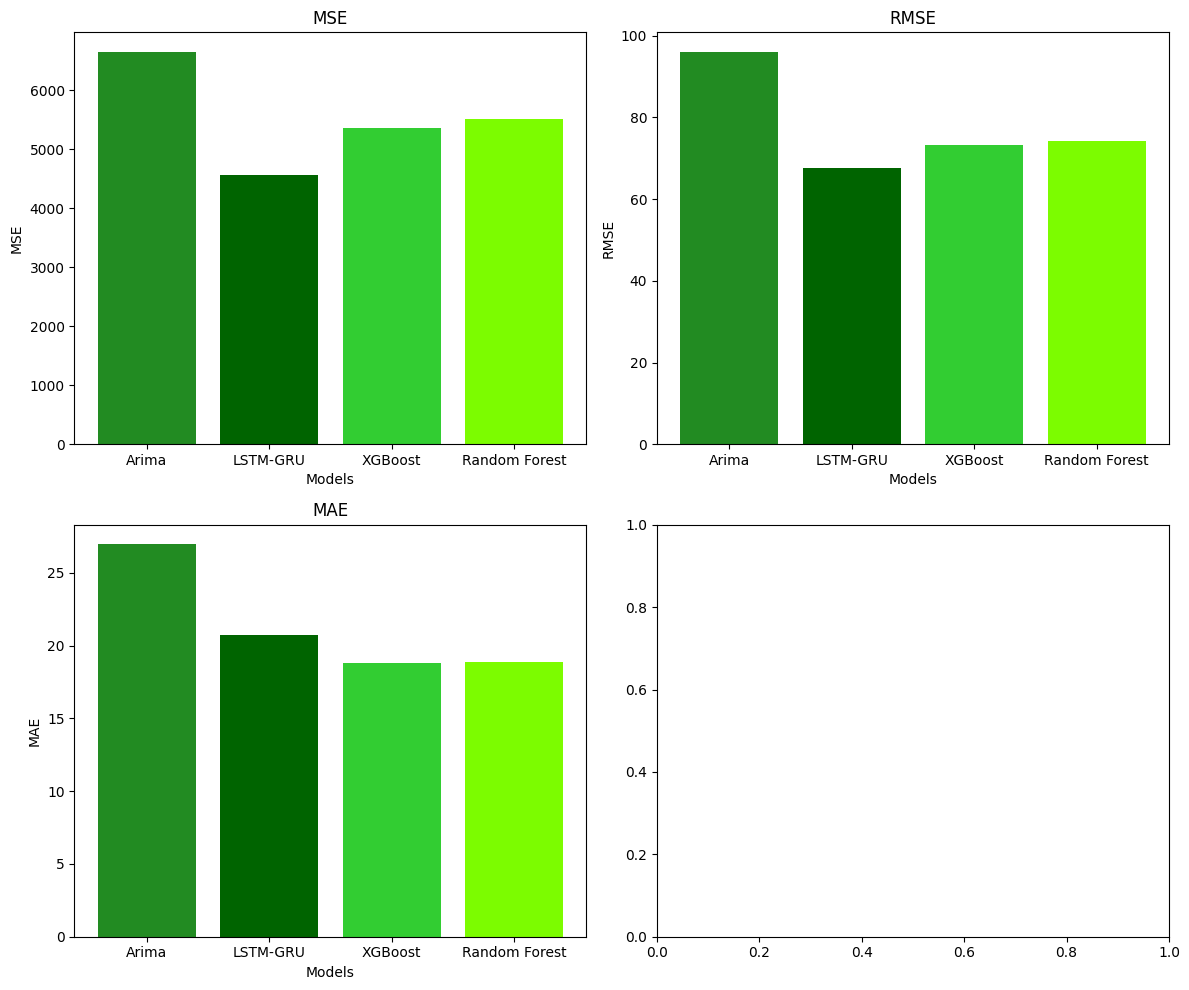

In [44]:
# Evaluation metrics
models = ['Arima', 'LSTM-GRU', 'XGBoost', 'Random Forest']
mse = [6647.3680, 4555.4439, 5367.0052, 5509.7560]
rmse = [96.0160, 67.4940, 73.2598, 74.2277]
mae = [26.9450, 20.7401, 18.8276, 18.8500]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

metrics = ['MSE', 'RMSE', 'MAE']
values = [mse, rmse, mae]

for i, (metric, vals) in enumerate(zip(metrics, values)):
    axs[i].bar(models, vals, color=['forestgreen', 'darkgreen', 'limegreen', 'lawngreen'])
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('Models')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Turning

### Neural Network Models LSTM-GRU

In [62]:
""" import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import keras_tuner as kt

# Assuming X and y are your input data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert DataFrames to NumPy arrays and reshape for LSTM/GRU
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), 
                   activation='relu', return_sequences=True))
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=128, step=32), 
                  activation='relu'))
    model.add(Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3])))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), 
                  loss='mean_absolute_error')
    return model

# Initialize the Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='lstm_gru_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train_reshaped, y_train, validation_split=0.2, batch_size=32)

# Retrieve the best model and parameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_models=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

# Train the final model using the best parameters on the entire training set
best_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = best_model.predict(X_test_reshaped).flatten()

# Display True vs Predicted Values
results = pd.DataFrame({'True Value': y_test, 'Predicted Value': y_pred})
print("\nTable of True vs Predicted Values:\n")
print(results.head(10))

# Calculate and print final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f'MSE: {mse:.4f} (lower is better)')
print(f'RMSE: {rmse:.4f} (lower is better)')
print(f'MAE: {mae:.4f} (lower is better)') """

' import numpy as np\nimport pandas as pd\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\nfrom sklearn.model_selection import train_test_split\nimport keras_tuner as kt\n\n# Assuming X and y are your input data\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Convert DataFrames to NumPy arrays and reshape for LSTM/GRU\nX_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))\nX_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))\n\n# Define the model-building function for Keras Tuner\ndef build_model(hp):\n    model = Sequential()\n    model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))\n    model.add(LSTM(units=hp.Int(\'units\', min_value=32, max_value=128, step=32), \n 

### ARIMA

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Define the function for tuning ARIMA using MAE
def tune_arima_mae(y_train, y_test, p_values, d_values, q_values):
    best_score, best_order = float("inf"), None
    best_model = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Define and fit the ARIMA model
                    model = ARIMA(y_train, order=(p, d, q))
                    model_fit = model.fit()
                    
                    # Forecast and calculate the MAE
                    y_pred = model_fit.forecast(steps=len(y_test))
                    mae = mean_absolute_error(y_test, y_pred)
                    
                    # Check if the current MAE score is the best (lowest)
                    if mae < best_score:
                        best_score, best_order = mae, (p, d, q)
                        best_model = model_fit
                except:
                    continue
    return best_model, best_order, best_score

# Specify reduced ranges for p, d, q parameters
p_values = [0, 1, 2]  # Reduced values for p
d_values = [0, 1]     # Reduced values for d
q_values = [0, 1, 2]  # Reduced values for q

# Tune the model
best_model, best_order, best_score = tune_arima_mae(y_train, y_test, p_values, d_values, q_values)

print(f'Best ARIMA order: {best_order} with MAE: {best_score}')

# Use the best model to make predictions on the test set
y_pred_best = best_model.forecast(steps=len(y_test))
results_best_arima = pd.DataFrame({'True Value': y_test.values, 'Predicted Value': y_pred_best})

c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kunr01\AppData\

Best ARIMA order: (0, 1, 0) with MAE: 20.18050076483375


c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kunr01\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
# Display Evaluation Metrics
print("\nEvaluation Metrics:")
print(f'MSE: {mse:.4f} (lower is better)')
print(f'RMSE: {rmse:.4f} (lower is better)')
print(f'MAE: {mae:.4f} (lower is better)')

# Display True vs Predicted Values
print("\nTable of True vs Predicted Values:\n")
print(results_best_arima.head(10))


Evaluation Metrics:
MSE: 6948.8350 (lower is better)
RMSE: 83.3597 (lower is better)
MAE: 20.1805 (lower is better)

Table of True vs Predicted Values:

        True Value  Predicted Value
596204           2              5.0
596205          10              5.0
596206           1              5.0
596207          22              5.0
596208          51              5.0
596209           5              5.0
596210           9              5.0
596211           2              5.0
596212          60              5.0
596213          10              5.0


### XGBoost

In [59]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Initialize the base model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define a reduced hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,  # Reduced number of combinations
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert to positive MAE

print("Best Parameters:", best_params)
print("Best MAE:", best_score)

# Train the model with the best parameters on the entire training set
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Convert predicted values to integers
y_pred_int = np.round(y_pred).astype(int)

# Create a DataFrame with True and Predicted values (as integers)
results = pd.DataFrame({'True Value': y_test, 'Predicted Value': y_pred_int})
print("\nTable of True vs Predicted Values:\n")
print(results.head(10))  # Show first 10 rows

# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, y_pred_int)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_int)

# Display the evaluation metrics
print("\nEvaluation Metrics:")
print(f'MSE: {mse:.4f} (lower is better)')
print(f'RMSE: {rmse:.4f} (lower is better)')
print(f'MAE: {mae:.4f} (lower is better)')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best MAE: 19.048195515945046

Table of True vs Predicted Values:

        True Value  Predicted Value
477538           2               24
437706          10                7
720484           1                2
518553          22               18
77559           51               87
365704           5               18
664789           9                3
136753           2                8
534925          60              131
461703          10                8

Evaluation Metrics:
MSE: 5395.7151 (lower is better)
RMSE: 73.4555 (lower is better)
MAE: 18.7514 (lower is better)


### Random Forest Regressor 

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Initialize the base model
rf_model = RandomForestRegressor()

# Define a reduced hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],                 # Reduced number of trees
    'max_depth': [10, 20, 30, None],                # Focused depth values
    'min_samples_split': [2, 5],                    # Common split values
    'min_samples_leaf': [1, 2],                     # Common leaf sizes
    'max_features': ['sqrt', 'log2'],               # Reduced feature selection methods
    'bootstrap': [True]                             # Using only bootstrap to control complexity
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=30,  # Reduced number of combinations
    scoring='neg_mean_absolute_error',  # Use MAE as the evaluation metric
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert to positive MAE

print("Best Parameters:", best_params)
print("Best MAE:", best_score)

# Train the model with the best parameters on the entire training set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Convert predictions to integers
y_pred_int = np.round(y_pred).astype(int)  # Round and convert to integer

# Create a DataFrame with True and Predicted values (as integers)
results = pd.DataFrame({'True Value': y_test, 'Predicted Value': y_pred_int})
print("\nTable of True vs Predicted Values:\n")
print(results.head())  # Show first few rows

# Calculate additional evaluation metrics
mse = mean_squared_error(y_test, y_pred_int)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_int)
r2 = r2_score(y_test, y_pred_int)

# Display the evaluation metrics
print("\nEvaluation Metrics:")
print(f'MSE: {mse:.4f} (lower is better)')
print(f'RMSE: {rmse:.4f} (lower is better)')
print(f'MAE: {mae:.4f} (lower is better)')
print(f'R²: {r2:.4f} (higher is better)')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best MAE: 19.124901064818243

Table of True vs Predicted Values:

        True Value  Predicted Value
477538           2               27
437706          10                8
720484           1                2
518553          22               18
77559           51              117

Evaluation Metrics:
MSE: 5478.9910 (lower is better)
RMSE: 74.0202 (lower is better)
MAE: 18.8293 (lower is better)
R²: 0.1758 (higher is better)


## Inference

## Model Saving

In [64]:
# Save the model
lstm_gru.save("lstm_gru_model.h5")
print("Model saved as lstm_gru_model.h5")

Model saved as lstm_gru_model.h5


In [65]:
import joblib

# Save the fitted scaler to a file
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


In [66]:
from tensorflow.keras.losses import MeanSquaredError

lstm_gru.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])
lstm_gru.save("lstm_gru_model.h5")

In [67]:
import joblib

# Save the best model using joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

print("Model saved as 'best_rf_model.pkl'")

Model saved as 'best_rf_model.pkl'
